In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(w, x, b):
    return sigmoid(w * x + b)

def cost_function(h, y):
    return -np.mean(y * np.log(h + 1e-8) + (1.0 - y) * np.log(1.0 - h + 1e-8))

In [2]:
N = 5000 # 전체 값의 개수
x = 40.0 * np.random.rand(N) - 20.0 # -20 ~ 20의 값을 랜덤으로 생성
z = 1.0 * x * 5.0
z = sigmoid(z)

y = np.where(z > 0.5, 1.0, 0.0)
idx = np.where(z > 0.5, True, False)

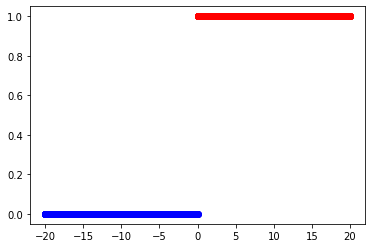

In [3]:
plt.plot(x[idx == True], y[idx==True], linestyle='None', marker='o', color='r')
plt.plot(x[idx == False], y[idx==False], linestyle='None', marker='o', color='b')
plt.show()

In [4]:
x_train = x[:4000]
y_train = y[:4000]

x_test = x[4000:]
y_test= y[4000:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4000,) (4000,) (1000,) (1000,)


In [5]:
w = np.random.rand()
b = np.random.rand()

print(w, b)

0.3080774943087041 0.4023357052413816


In [6]:
epoch = 30000
alpha = 6e-2

# 선형회귀와 큰 차이가 없음.
total_loss = []
for i in range(epoch):
    h = hypothesis(w, x, b)
    loss = cost_function(h, y)

    w = w - alpha * np.mean((h - y) * x)
    b = b - alpha * np.mean(h - y)
    total_loss.append(loss)

total_loss = np.array(total_loss)

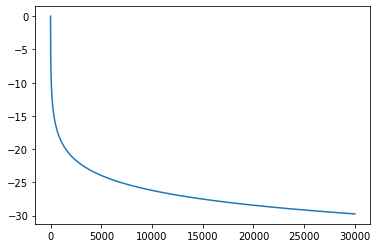

In [7]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-5))))
plt.show()

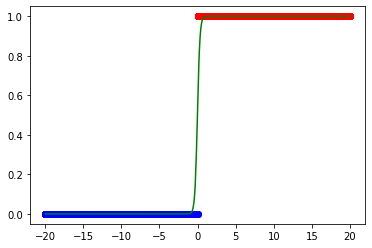

In [8]:
x_test_sorted = np.sort(x_test)
y_pred = hypothesis(w, x_test_sorted, b)

plt.plot(x[idx == True], y[idx == True], linestyle='None', marker='o', color='r')
plt.plot(x[idx == False], y[idx == False], linestyle='None', marker='o', color='b')
plt.plot(x_test_sorted, y_pred, color='g')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = hypothesis(w, x_test, b)
y_pred = np.round(y_pred)

acc = accuracy_score(y_test, y_pred)
print(acc)

1.0
